In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import cv2
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.layers import BatchNormalization
import pickle
import os
import warnings
warnings.filterwarnings("ignore")       
plt.style.use('fivethirtyeight') 



In [9]:
train = pd.read_csv('/content/TrainData.csv')
test = pd.read_csv('/content/TestData.csv')
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


In [10]:
train.shape


(12844, 785)

In [11]:
train_label=train['label']
train_label.head()
trainset=train.drop(['label'],axis=1)
trainset.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [12]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(12844, 28, 28, 1)


In [13]:
test_label=test['label']
X_test=test.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(4267, 784)


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,253,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [14]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [15]:
print(y_train)
print("-------------------")
print(y_test)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
-------------------
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [16]:
X_test=X_test.values.reshape(-1,28,28,1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(12844, 28, 28, 1) (12844, 27) (4267, 28, 28, 1) (4267, 27)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

In [18]:
base={0:'0',1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H',9:'I',10:'J',11:'K',12:'L',13:'M',14:'N',
      15:'O',16:'P',17:'Q',18:'R',19:'S',20:'T',21:'U',22:'V',23:'W',24:'X',25:'Y',26:'Z'}

In [19]:
label = np.argmax(y_train,axis=1)
label

array([ 0,  0,  0, ..., 26, 26, 26])

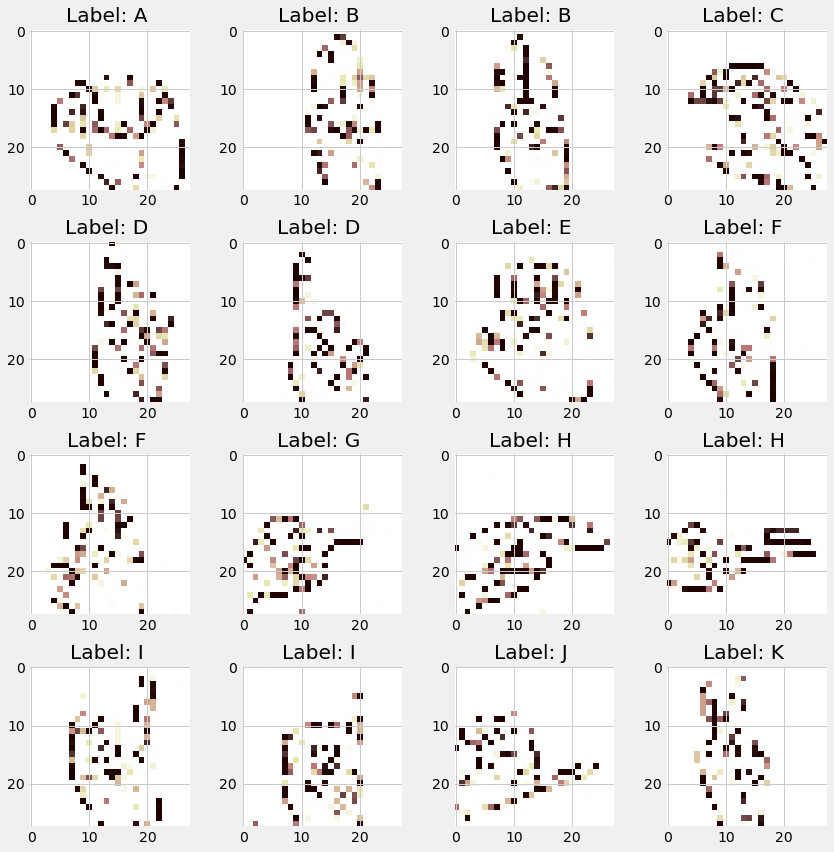

In [20]:
f, mx= plt.subplots(4,4,figsize=(12,12))
k=800
for i in range(4):
    for j in range(4):
        mx[i,j].set_title("Label: {} ".format(base[label[k]]))
        mx[i,j].imshow(X_train[k].reshape(28,28),cmap='pink')
        k+=300
        
    plt.tight_layout()

Model Building

In [21]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

model.add(Conv2D(16,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

In [22]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=27,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
X_test.shape,y_test.shape,X_train.shape,y_train.shape

((4267, 28, 28, 1), (4267, 27), (12844, 28, 28, 1), (12844, 27))

In [25]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 135,
          validation_data=(X_test,y_test),
          shuffle=1)

Epoch 1/135
65/65 [==============================] - 41s 571ms/step - loss: 3.2708 - accuracy: 0.0504 - val_loss: 3.0631 - val_accuracy: 0.1730
Epoch 2/135
65/65 [==============================] - 35s 544ms/step - loss: 2.7730 - accuracy: 0.1784 - val_loss: 2.3699 - val_accuracy: 0.2758
Epoch 3/135
65/65 [==============================] - 38s 584ms/step - loss: 2.2926 - accuracy: 0.2829 - val_loss: 1.6838 - val_accuracy: 0.4593
Epoch 4/135
65/65 [==============================] - 36s 552ms/step - loss: 1.9796 - accuracy: 0.3721 - val_loss: 1.4670 - val_accuracy: 0.5214
Epoch 5/135
65/65 [==============================] - 36s 557ms/step - loss: 1.7247 - accuracy: 0.4411 - val_loss: 1.0509 - val_accuracy: 0.6510
Epoch 6/135
65/65 [==============================] - 36s 552ms/step - loss: 1.6149 - accuracy: 0.4704 - val_loss: 0.9863 - val_accuracy: 0.6674
Epoch 7/135
65/65 [==============================] - 37s 567ms/step - loss: 1.4626 - accuracy: 0.5175 - val_loss: 0.9435 - val_accuracy:

In [26]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

134/134 [==============================] - 5s 36ms/step - loss: 0.2033 - accuracy: 0.9222


In [27]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 92.21935868263245%


In [28]:
pd=model.predict(X_test) 
classes_x=np.argmax(pd,axis=1)

In [29]:
pd[0],classes_x[0]

(array([1.0000000e+00, 1.6062223e-14, 3.0396956e-11, 9.4976212e-15,
        1.6449364e-11, 9.9155721e-13, 3.4566361e-14, 2.4639437e-09,
        1.3622037e-10, 8.5053804e-12, 2.8078573e-14, 1.9019036e-10,
        9.9987462e-15, 2.4263117e-10, 4.6537307e-13, 2.3338148e-10,
        1.3561651e-11, 2.5977958e-13, 8.9526879e-11, 1.7391570e-14,
        4.6877827e-12, 1.3390578e-10, 5.3312874e-09, 1.1016715e-11,
        4.0269656e-11, 1.7701089e-15, 2.8119186e-11], dtype=float32), 0)

In [30]:
len(classes_x),len(pd)

(4267, 4267)

Predicted: 5


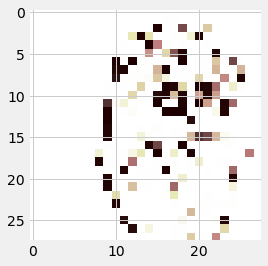

In [31]:
print("Predicted: {}".format(classes_x[800]))
plt.imshow(X_test[800].reshape(28,28),cmap='pink')

In [32]:
actual = np.argmax(y_test,axis=1)
actual

array([ 0,  0,  0, ..., 26, 26, 26])

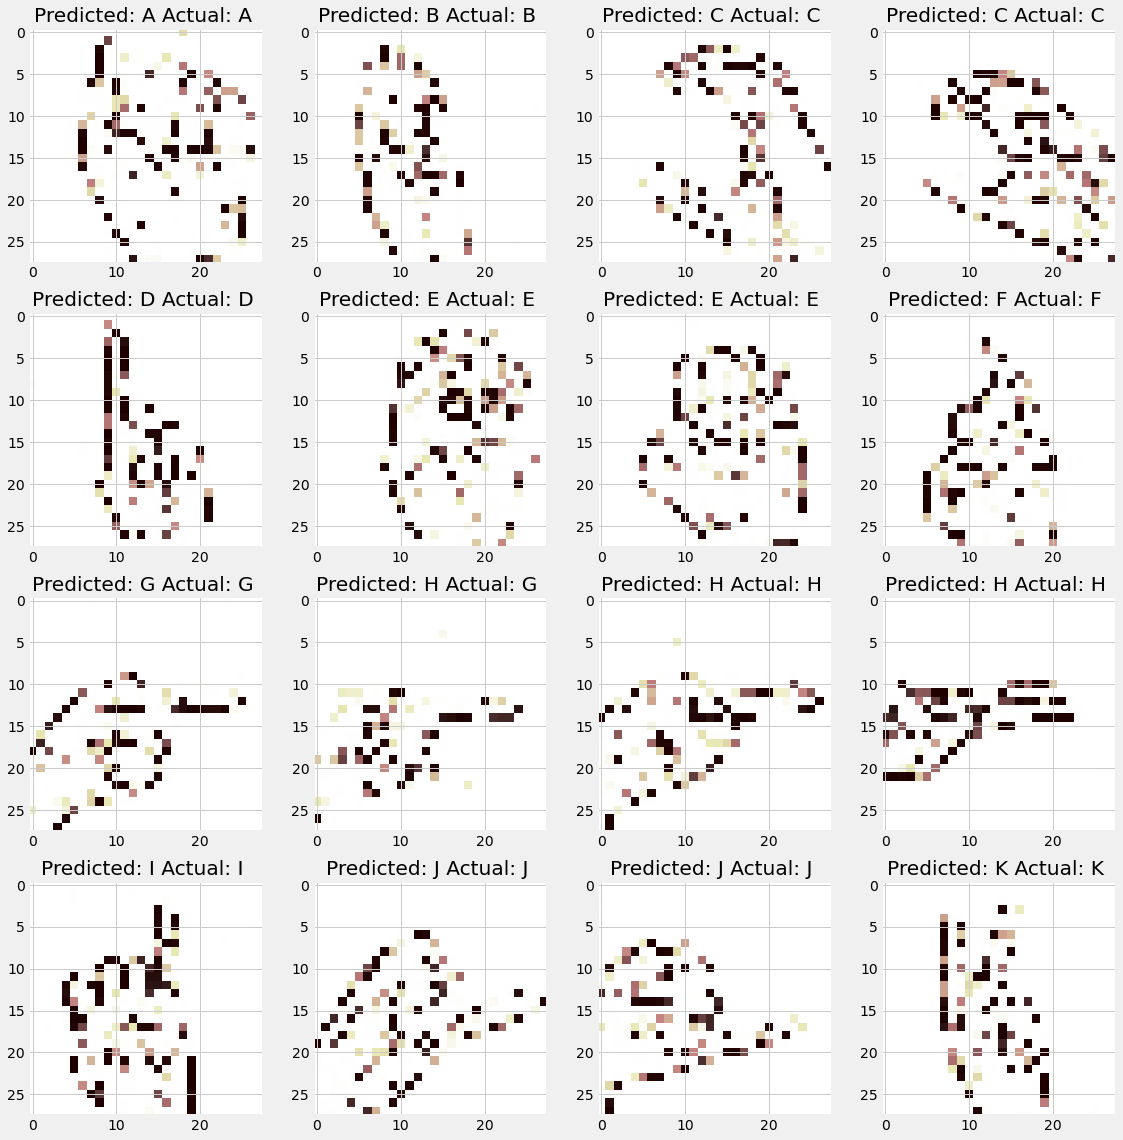

In [33]:
f, mx= plt.subplots(4,4,figsize=(16,16))
k=300
for i in range(4):
    for j in range(4):
        mx[i,j].set_title("Predicted: {} Actual: {} ".format(base[classes_x[k]],base[actual[k]]))
        mx[i,j].imshow(X_test[k].reshape(28,28),cmap='pink')
        k+=100
        
    plt.tight_layout()